# TASK 1 : Prediction using supervised ML
# Predict the percentage of a student based on number of study hours.
# Submitted by : Apurv Deshpande

### IMPORTING NECESSARY LIBRARIES AND DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(data)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
np.transpose(df.describe())

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


### PERFORMING EDA ->Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.drop_duplicates().head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


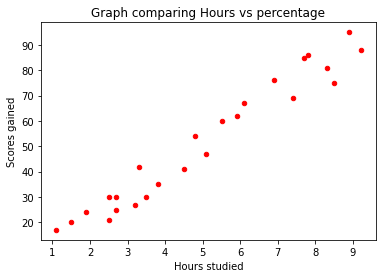

In [7]:
#plotting the data 
df.plot(kind='scatter',x='Hours',y='Scores',style='o',color='red')
plt.title('Graph comparing Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('Scores gained')
plt.show()

In [8]:
df.corr() #correlation matrix

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


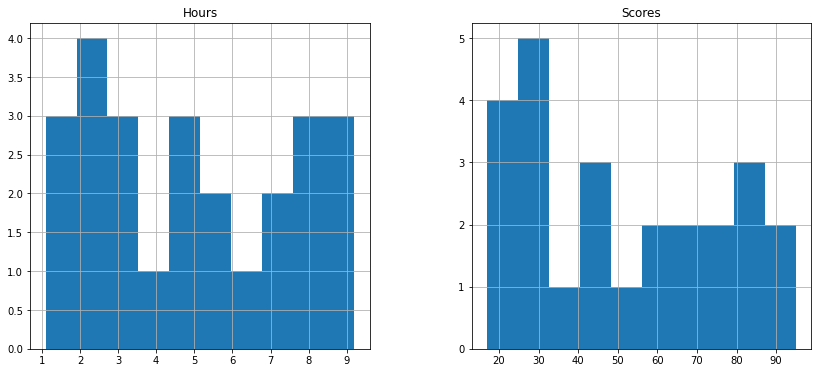

In [9]:
df.hist(figsize=(14,6))
plt.show()

# Observing the above visuals, we see that there must be a LINEAR relationship between total number of hours studied and scores obtained.

### Now, we prepare training and testing sets.

In [10]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [11]:
x.transpose()

array([[2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
        3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8]])

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### We use the Train-Test-Split model.

In [13]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train,y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

### 20% data is used for testing, 80% data is used for training.
### We use Linear Regression technique for making predictions.

In [14]:
from sklearn.linear_model import LinearRegression  
regression = LinearRegression()  
regression.fit(x_train, y_train) 

LinearRegression()

In [15]:
x_train.transpose()

array([[3.8, 1.9, 7.8, 6.9, 1.1, 5.1, 7.7, 3.3, 8.3, 9.2, 6.1, 3.5, 2.7,
        5.5, 2.7, 8.5, 2.5, 4.8, 8.9, 4.5]])

In [16]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [17]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [18]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

### Training of data is completed.

In [19]:
regression.coef_
regression.intercept_

2.018160041434683

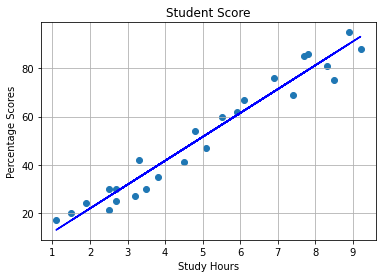

In [20]:
line = regression.coef_*x+regression.intercept_

plt.scatter(x, y)
plt.plot(x, line, color='blue');
plt.title("Student Score")
plt.xlabel("Study Hours")
plt.ylabel("Percentage Scores")
plt.grid()
plt.show()

### Now, we make the predictions.

In [21]:
y_pred = regression.predict(x_test)

###  Comparing predicted and actual values :

In [22]:
df2=pd.DataFrame({'Actual Data':y_test,'Predicted':y_pred})
df2.tail()

,Actual Data,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Our task is to predict the approxiamate value of scores obtained by a student if he/she studies for 9.25 hours daily. 

In [23]:
hours = 9.25
own_pred = regression.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Thus, we observe that the student would obtain about 93.69 % 

### Model Evaluation

In [29]:
from sklearn.metrics import r2_score,mean_absolute_error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print("R2 score: ",r2_score(y_pred,y_test))

Mean Absolute Error: 4.183859899002975
R2 score:  0.9546785947197246


# Thus, we have successfully predicted the percentage of a student based on the number of study hours.

# THANK YOU!